<a href="https://colab.research.google.com/github/mathieulecl/Testgit/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectif du TP :
Créer un modèle CNN pour classifier les images de chiffres manuscrits de la base de données MNIST.

#### Installation
```sh
pip install keras
pip install np_utils
```

In [1]:
!pip install keras
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 202.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=6131a1dde5396b1d0dd3d78c8c2365739a458d84630ce562e400a868aec83474
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


Importation des bibliothèques nécessaires

In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam


### Chargement et préparation des données
Les données MNIST sont divisées en deux ensembles : un pour l’entraînement et un pour les tests.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Création du modèle CNN
model = Sequential()

# Couche de convolution 2D avec 32 filtres et une taille de noyau de 3x3 ReLU
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Couche de pooling 2x2 pour réduire la taille des images
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ajout d'une deuxième couche de convolution 2D avec 64 filtres et une taille de noyau de 3x3 ReLU
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Ajout d'une deuxième couche de pooling idem que la première couche de pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatissement de la sortie des couches précédentes pour connecter à une couche dense
model.add(Flatten())

# Couche dense avec 128 neurones
model.add(Dense(128, activation='relu'))

# Couche de sortie avec 10 neurones (1 pour chaque chiffre de 0 à 9)
model.add(Dense(10, activation='softmax'))

# Afficher le résumé du modèle
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Chargement des données MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Redimensionner les données pour correspondre à l'entrée du modèle (28x28 images avec 1 canal)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Encodage one-hot des étiquettes
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Création du modèle CNN
Le modèle CNN que nous allons construire comportera plusieurs couches : une couche de convolution, une couche de pooling, et une couche dense finale.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Création du modèle CNN
model = Sequential()

# Couche de convolution 2D avec 32 filtres et une taille de noyau de 3x3 ReLU
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Couche de pooling 2x2 pour réduire la taille des images
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ajout d'une deuxième couche de convolution 2D avec 64 filtres et une taille de noyau de 3x3 ReLU
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Ajout d'une deuxième couche de pooling idem que la première couche de pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatissement de la sortie des couches précédentes pour connecter à une couche dense
model.add(Flatten())

# Couche dense avec 128 neurones
model.add(Dense(128, activation='relu'))

# Couche de sortie avec 10 neurones (1 pour chaque chiffre de 0 à 9)
model.add(Dense(10, activation='softmax'))

# Affichage du résumé du modèle
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None


### Compilation du modèle
Nous allons utiliser l'optimiseur Adam et la fonction de perte categorical_crossentropy pour entraîner le modèle.

In [5]:
# Compilation du modèle
model.compile(
    optimizer='adam',  # Optimiseur Adam
    loss='categorical_crossentropy',  # Fonction de perte pour classification multi-classe
    metrics=['accuracy']  # Métrique pour évaluer la précision
)


### Entraînement du modèle
Nous allons entraîner le modèle sur les données MNIST en utilisant les données d'entraînement et en validant sur les données de test.

In [6]:
# Entraînement du modèle

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=200, verbose=2)


Epoch 1/5
300/300 - 6s - 21ms/step - accuracy: 0.9256 - loss: 0.2636 - val_accuracy: 0.9791 - val_loss: 0.0683
Epoch 2/5
300/300 - 1s - 5ms/step - accuracy: 0.9814 - loss: 0.0622 - val_accuracy: 0.9837 - val_loss: 0.0475
Epoch 3/5
300/300 - 2s - 5ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9862 - val_loss: 0.0425
Epoch 4/5
300/300 - 1s - 5ms/step - accuracy: 0.9898 - loss: 0.0335 - val_accuracy: 0.9898 - val_loss: 0.0311
Epoch 5/5
300/300 - 1s - 4ms/step - accuracy: 0.9921 - loss: 0.0257 - val_accuracy: 0.9887 - val_loss: 0.0323


### Évaluation du modèle
Après l'entraînement, nous allons évaluer les performances du modèle sur l'ensemble de test.


In [7]:
# Évaluation du modèle sur les données de test
score = model.evaluate(X_test, Y_test, verbose=0)

# Affichage de la précision obtenue
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")


Test loss: 0.03234703838825226
Test accuracy: 0.9886999726295471


### Visualisation des résultats d'entraînement
Nous pouvons tracer l'évolution de la précision et de la perte pendant l'entraînement.

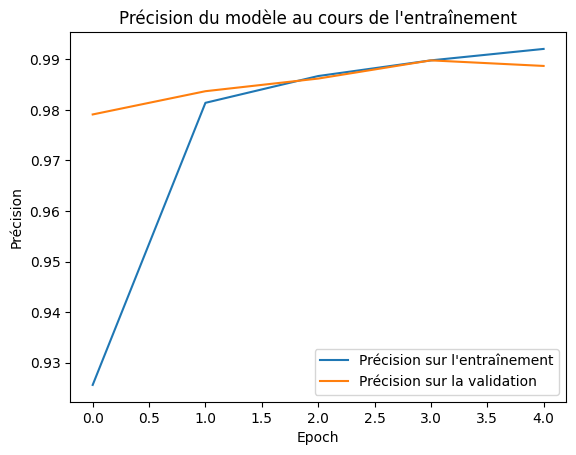

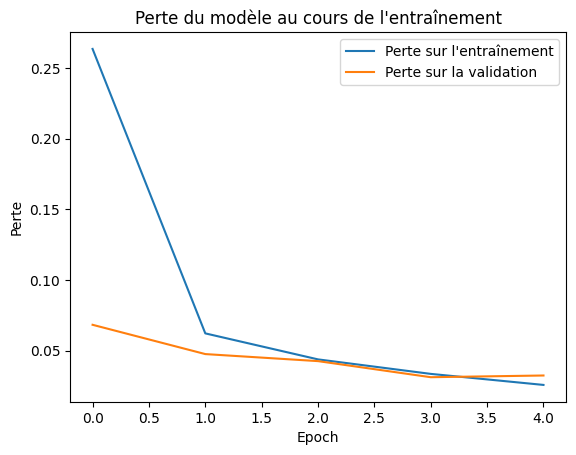

In [8]:
# Tracé de la courbe de la précision pendant l'entraînement
plt.plot(history.history['accuracy'], label='Précision sur l\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision sur la validation')
plt.title('Précision du modèle au cours de l\'entraînement')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Tracé de la courbe de la perte pendant l'entraînement
plt.plot(history.history['loss'], label='Perte sur l\'entraînement')
plt.plot(history.history['val_loss'], label='Perte sur la validation')
plt.title('Perte du modèle au cours de l\'entraînement')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()
plt.show()


Après l'observation de la coubre d'apprentissage, quelle parameter tu peux modifer pour améliorer la résultat.

In [9]:
from tensorflow.keras.optimizers import SGD
new_optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(
    optimizer=new_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=15,
    batch_size=64,
    verbose=2
)


Epoch 1/15
938/938 - 6s - 6ms/step - accuracy: 0.9946 - loss: 0.0175 - val_accuracy: 0.9908 - val_loss: 0.0280
Epoch 2/15
938/938 - 2s - 3ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9916 - val_loss: 0.0259
Epoch 3/15
938/938 - 2s - 3ms/step - accuracy: 0.9959 - loss: 0.0135 - val_accuracy: 0.9909 - val_loss: 0.0267
Epoch 4/15
938/938 - 3s - 3ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9899 - val_loss: 0.0283
Epoch 5/15
938/938 - 5s - 5ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9918 - val_loss: 0.0262
Epoch 6/15
938/938 - 2s - 2ms/step - accuracy: 0.9972 - loss: 0.0090 - val_accuracy: 0.9911 - val_loss: 0.0307
Epoch 7/15
938/938 - 3s - 3ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9924 - val_loss: 0.0288
Epoch 8/15
938/938 - 3s - 3ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 9/15
938/938 - 2s - 2ms/step - accuracy: 0.9982 - loss: 0.0064 - val_accuracy: 0.9911 - val_loss: 0.0309
E

### Importation de ImageDataGenerator
Nous allons importer ImageDataGenerator de Keras pour appliquer des transformations comme la rotation, la translation, le zoom, etc.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Création du générateur de données avec augmentation
Nous allons maintenant définir un générateur d'images qui applique des transformations aléatoires aux images pendant l'entraînement.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Création du générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=20,         # Rotation aléatoire des images entre -20° et +20°
    width_shift_range=0.2,     # Déplacement horizontal des images (20% de l'image)
    height_shift_range=0.2,    # Déplacement vertical des images (20% de l'image)
    shear_range=0.2,           # Cisaillement des images
    zoom_range=0.2,            # Zoom sur les images (20% de zoom)
    horizontal_flip=True,      # Retourner les images horizontalement
    fill_mode='nearest'        # Stratégie de remplissage des pixels vides après transformation
)

# Ajustement du générateur sur les données d'entraînement
datagen.fit(X_train)


Nous allons maitenant utiliser le modèle avec augementation et visualiser des résultats d'entraînement

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 - 20s - 68ms/step - accuracy: 0.3698 - loss: 1.8544 - val_accuracy: 0.7407 - val_loss: 0.8536
Epoch 2/10
300/300 - 20s - 67ms/step - accuracy: 0.5943 - loss: 1.1716 - val_accuracy: 0.7809 - val_loss: 0.6600
Epoch 3/10
300/300 - 19s - 62ms/step - accuracy: 0.6809 - loss: 0.9385 - val_accuracy: 0.8697 - val_loss: 0.4136
Epoch 4/10
300/300 - 21s - 70ms/step - accuracy: 0.7453 - loss: 0.7529 - val_accuracy: 0.9022 - val_loss: 0.3082
Epoch 5/10
300/300 - 21s - 70ms/step - accuracy: 0.7916 - loss: 0.6234 - val_accuracy: 0.9395 - val_loss: 0.2026
Epoch 6/10
300/300 - 19s - 63ms/step - accuracy: 0.8241 - loss: 0.5372 - val_accuracy: 0.9413 - val_loss: 0.1882
Epoch 7/10
300/300 - 22s - 72ms/step - accuracy: 0.8452 - loss: 0.4732 - val_accuracy: 0.9406 - val_loss: 0.1926
Epoch 8/10
300/300 - 19s - 64ms/step - accuracy: 0.8656 - loss: 0.4151 - val_accuracy: 0.9477 - val_loss: 0.1611
Epoch 9/10
300/300 - 20s - 66ms/step - accuracy: 0.8749 - loss: 0.3915 - val_accuracy: 0.9561 - val_loss: 0

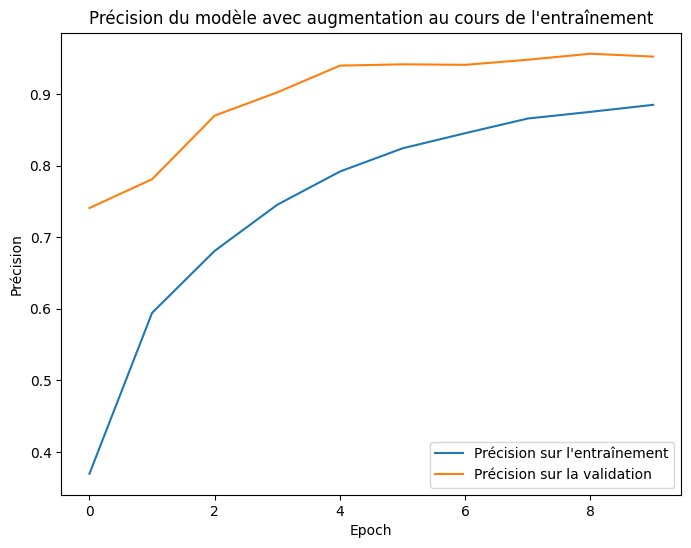

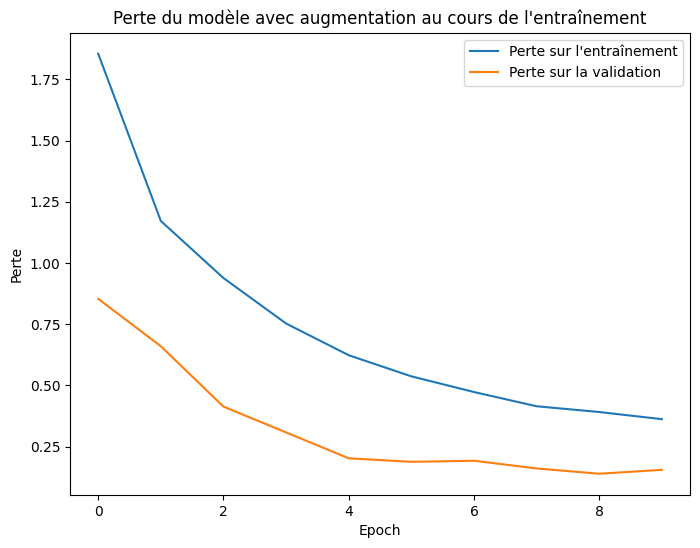

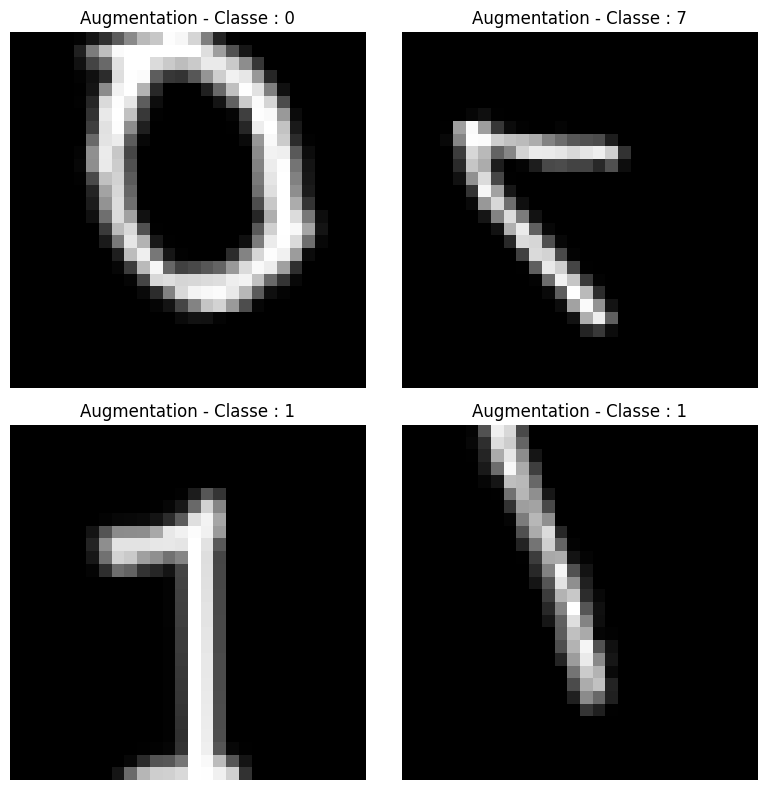

In [12]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=200),
    validation_data=(X_test, Y_test),
    epochs=10,
    verbose=2
)

score = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Précision sur l\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision sur la validation')
plt.title('Précision du modèle avec augmentation au cours de l\'entraînement')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Perte sur l\'entraînement')
plt.plot(history.history['val_loss'], label='Perte sur la validation')
plt.title('Perte du modèle avec augmentation au cours de l\'entraînement')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()
plt.show()

for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=4, shuffle=True):
    plt.figure(figsize=(8, 8))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.title(f"Augmentation - Classe : {np.argmax(Y_batch[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    break



### Tester autres modèles CNN
Maitenant nous allons tester autres architecture de CNN disponible.
Voici la liste de modèle disponible: [Available models](https://keras.io/api/applications/)
https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

Forme initiale de X_train : (60000, 28, 28, 1)
Forme initiale de Y_train : (60000, 10)
Forme initiale de X_test : (10000, 28, 28, 1)
Forme initiale de Y_test : (10000, 10)
Forme après redimensionnement de X_train : (60000, 32, 32, 3)
Forme après redimensionnement de X_test : (10000, 32, 32, 3)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 - 67s - 36ms/step - accuracy: 0.6996 - loss: 0.9134 - val_accuracy: 0.8560 - val_loss: 0.4529
Epoch 2/5
1875/1875 - 75s - 40ms/step - accuracy: 0.7983 - loss: 0.6122 - val_accuracy: 0.8830 - val_loss: 0.3690
Epoch 3/5
1875/1875 - 80s - 43ms/step - accuracy: 0.8170 - loss: 0.5580 - val_accuracy: 0.8834 - val_loss: 0.3554
Epoch 4/5
1875/1875 - 52s - 28ms/step - accuracy: 0.8320 - loss: 0.5122 - val_accuracy: 0.8885 - val_loss: 0.3332
Epoch 5/5
1875/1875 - 83s - 44ms/step - accuracy: 0.8383 - loss: 0.4941 - val_accuracy: 0.9043 - val_loss: 0.2989
Test loss: 0.2988767921924591
Test accuracy: 0.9042999744415283


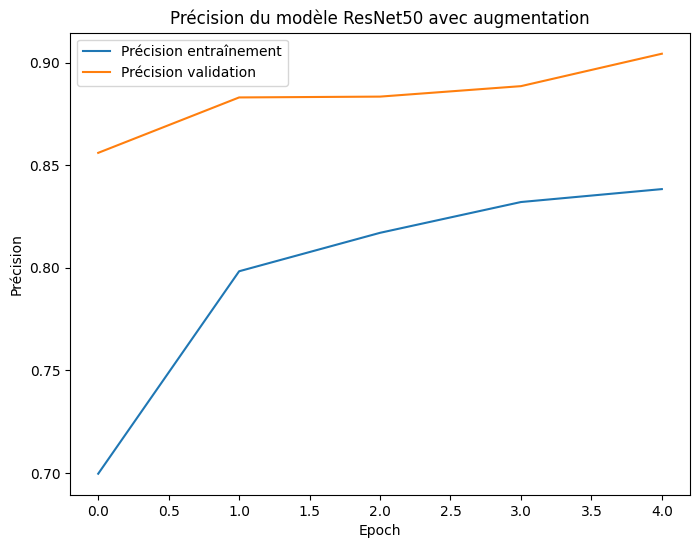

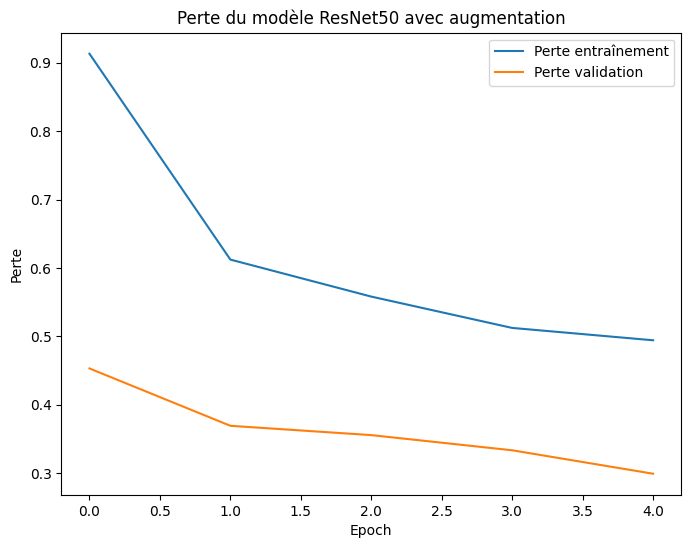

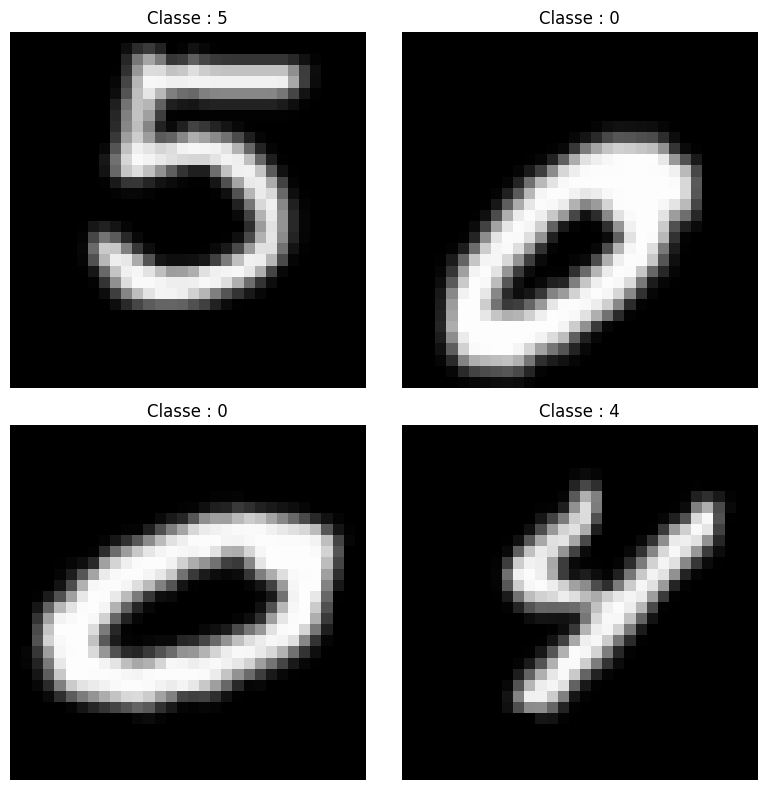

Epoch 1/5
1875/1875 - 75s - 40ms/step - accuracy: 0.5780 - loss: 2.1704 - val_accuracy: 0.8057 - val_loss: 0.8798
Epoch 2/5
1875/1875 - 55s - 30ms/step - accuracy: 0.7456 - loss: 0.8772 - val_accuracy: 0.8503 - val_loss: 0.5676
Epoch 3/5
1875/1875 - 82s - 44ms/step - accuracy: 0.8092 - loss: 0.6309 - val_accuracy: 0.8995 - val_loss: 0.3738
Epoch 4/5
1875/1875 - 54s - 29ms/step - accuracy: 0.8424 - loss: 0.5111 - val_accuracy: 0.9123 - val_loss: 0.3066
Epoch 5/5
1875/1875 - 54s - 29ms/step - accuracy: 0.8663 - loss: 0.4376 - val_accuracy: 0.9131 - val_loss: 0.2888
Test loss après fine-tuning: 0.2887851595878601
Test accuracy après fine-tuning: 0.913100004196167


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize

# -----------------------------------------------------
# Chargement du dataset MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train : (60000, 28, 28), Y_train : (60000,)
# X_test : (10000, 28, 28), Y_test : (10000,)

# Ajout d'une dimension pour le canal
X_train = np.expand_dims(X_train, axis=-1)  # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)    # (10000, 28, 28, 1)

# Encodage one-hot des étiquettes
Y_train = to_categorical(Y_train, 10)  # (60000, 10)
Y_test = to_categorical(Y_test, 10)    # (10000, 10)

print("Forme initiale de X_train :", X_train.shape)  # (60000, 28, 28, 1)
print("Forme initiale de Y_train :", Y_train.shape)  # (60000, 10)
print("Forme initiale de X_test :", X_test.shape)    # (10000, 28, 28, 1)
print("Forme initiale de Y_test :", Y_test.shape)    # (10000, 10)

# -----------------------------------------------------
# Conversion en RGB : (28,28,1) -> (28,28,3)
X_train_rgb = np.repeat(X_train, 3, axis=-1)  # (60000, 28, 28, 3)
X_test_rgb = np.repeat(X_test, 3, axis=-1)    # (10000, 28, 28, 3)

# Redimensionnement à 32x32 pour ResNet50
X_train_resized = np.array([resize(img, (32, 32)).numpy() for img in X_train_rgb])
X_test_resized = np.array([resize(img, (32, 32)).numpy() for img in X_test_rgb])

print("Forme après redimensionnement de X_train :", X_train_resized.shape)  # (60000, 32, 32, 3)
print("Forme après redimensionnement de X_test :", X_test_resized.shape)    # (10000, 32, 32, 3)

# Normalisation
X_train_resized = X_train_resized.astype('float32') / 255.0
X_test_resized = X_test_resized.astype('float32') / 255.0

# -----------------------------------------------------
# Générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False, # inutile de retourner horizontalement des chiffres
    fill_mode='nearest'
)
datagen.fit(X_train_resized)

# -----------------------------------------------------
# Modèle ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Geler les couches du base_model (entraînement initial uniquement sur les couches ajoutées)
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------------------------------
# Entraînement du modèle
history = model.fit(
    datagen.flow(X_train_resized, Y_train, batch_size=32),
    validation_data=(X_test_resized, Y_test),
    epochs=5,  # Essayez plus d'epochs si nécessaire
    verbose=2
)

# Évaluation du modèle
score = model.evaluate(X_test_resized, Y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

# -----------------------------------------------------
# Visualisation des résultats d'entraînement

# Précision
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Précision du modèle ResNet50 avec augmentation')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Perte
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Perte du modèle ResNet50 avec augmentation')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()
plt.show()

# -----------------------------------------------------
# Visualisation des exemples augmentés
X_batch, Y_batch = next(datagen.flow(X_train_resized, Y_train, batch_size=4, shuffle=True))
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_batch[i])
    plt.title(f"Classe : {np.argmax(Y_batch[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Fine-tuning (optionnel)
# Dégeler certaines couches de ResNet50 pour améliorer la performance
for layer in base_model.layers[:140]:
    layer.trainable = False
for layer in base_model.layers[140:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine_tuning = model.fit(
    datagen.flow(X_train_resized, Y_train, batch_size=32),
    validation_data=(X_test_resized, Y_test),
    epochs=5,
    verbose=2
)

score_ft = model.evaluate(X_test_resized, Y_test, verbose=0)
print(f"Test loss après fine-tuning: {score_ft[0]}")
print(f"Test accuracy après fine-tuning: {score_ft[1]}")


### Fine-tuning des couches convolutives
Une fois les couches denses entraînées, vous pouvez débloquer certaines couches convolutives de ResNet pour effectuer un fine-tuning complet.